# ランダムフォレスト過程によるモデリング

今回は,scikit-learnを用いてランダムフォレストを実装し時系列予測を行う。

ライブラリをインポートする

In [2]:
from sklearn.gaussian_process import kernels as sk_kern
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# ある時系列から入力データに変換する
def convert2input(arr, m_t):
    if (len(arr)<m_t):
        print("input length must be longer than ", m_t)
    else:
        return arr[:m_t]

## 線形定常な時系列の予測

ここでは、正弦波 + ガウシアンノイズの時系列を用いる

In [130]:
# 元データを準備する
t_arr = np.linspace(0, 100, 2000)

x_ordt = np.sin(t_arr) + np.random.normal(0, 0.05, t_arr.shape)
                                       

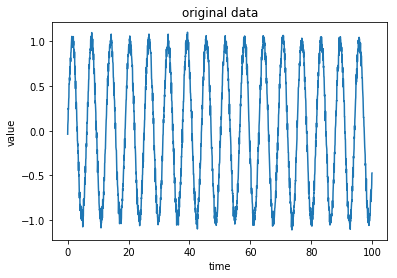

In [131]:
# 元データをプロット
plt.plot(t_arr, x_ordt)
plt.xlabel("time")
plt.ylabel("value")
plt.title("original data")
plt.show()

In [132]:
RFR1 =  RandomForestRegressor(max_depth=20, n_estimators=100)

In [133]:
# lsはliner static　線形定常のこと

#学習に使えるデータの大きさ
N4L_ls = 1000

# m_t  はn+1ステップを予測するための時系列のサンプル数
m_t_ls = 40
x_train_ls = np.array([x_ordt[ii : ii + m_t_ls ] for ii in range( N4L_ls - m_t_ls)])
y_train_ls = x_ordt[m_t_ls:N4L_ls]
print("shape x_train", x_train_ls.shape)
print("shape y_train", y_train_ls.shape)

shape x_train (960, 40)
shape y_train (960,)


In [134]:
# X は (n_samples, n_features) の shape に変形する必要がある
RFR1.fit(x_train_ls, y_train_ls)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [135]:
# 予測用のデータを準備。ここでは学習データの一番新しいものを予測のはじめの入力とする

x_test_ls = x_train_ls[-1]
print(x_test_ls)
print(x_test_ls.shape)

print(x_test_ls.reshape(-1, 1).shape)

[-0.74528991 -0.72058776 -0.74063359 -0.90970178 -0.91254529 -0.98180747
 -0.94908865 -1.00572806 -0.98489045 -0.96032178 -1.0367976  -0.85866396
 -1.00918081 -0.96450727 -0.969684   -0.91803977 -0.92563696 -1.05956918
 -0.98342787 -1.03088331 -0.94452551 -0.95627826 -0.91577688 -0.95144602
 -0.92157191 -0.88062021 -0.87101584 -0.8007526  -0.76218616 -0.69918974
 -0.60732653 -0.616973   -0.68185729 -0.53835871 -0.48905044 -0.52533973
 -0.38079648 -0.38160167 -0.36239663 -0.36058467]
(40,)
(40, 1)


In [136]:
# 予測の長さ
len_pred_ls = 1000

# for loop で漸化式的に時系列を予測
for ii in range(len_pred_ls ):
    
   
    y_pred_ls = RFR1.predict(x_test_ls[-m_t_ls:].reshape(1, -1))

    x_test_ls = np.append(x_test_ls, y_pred_ls)
    
x_pred_ls = x_test_ls[m_t_ls:]


print("shape mean_pred", x_pred_ls.shape)


shape mean_pred (1000,)


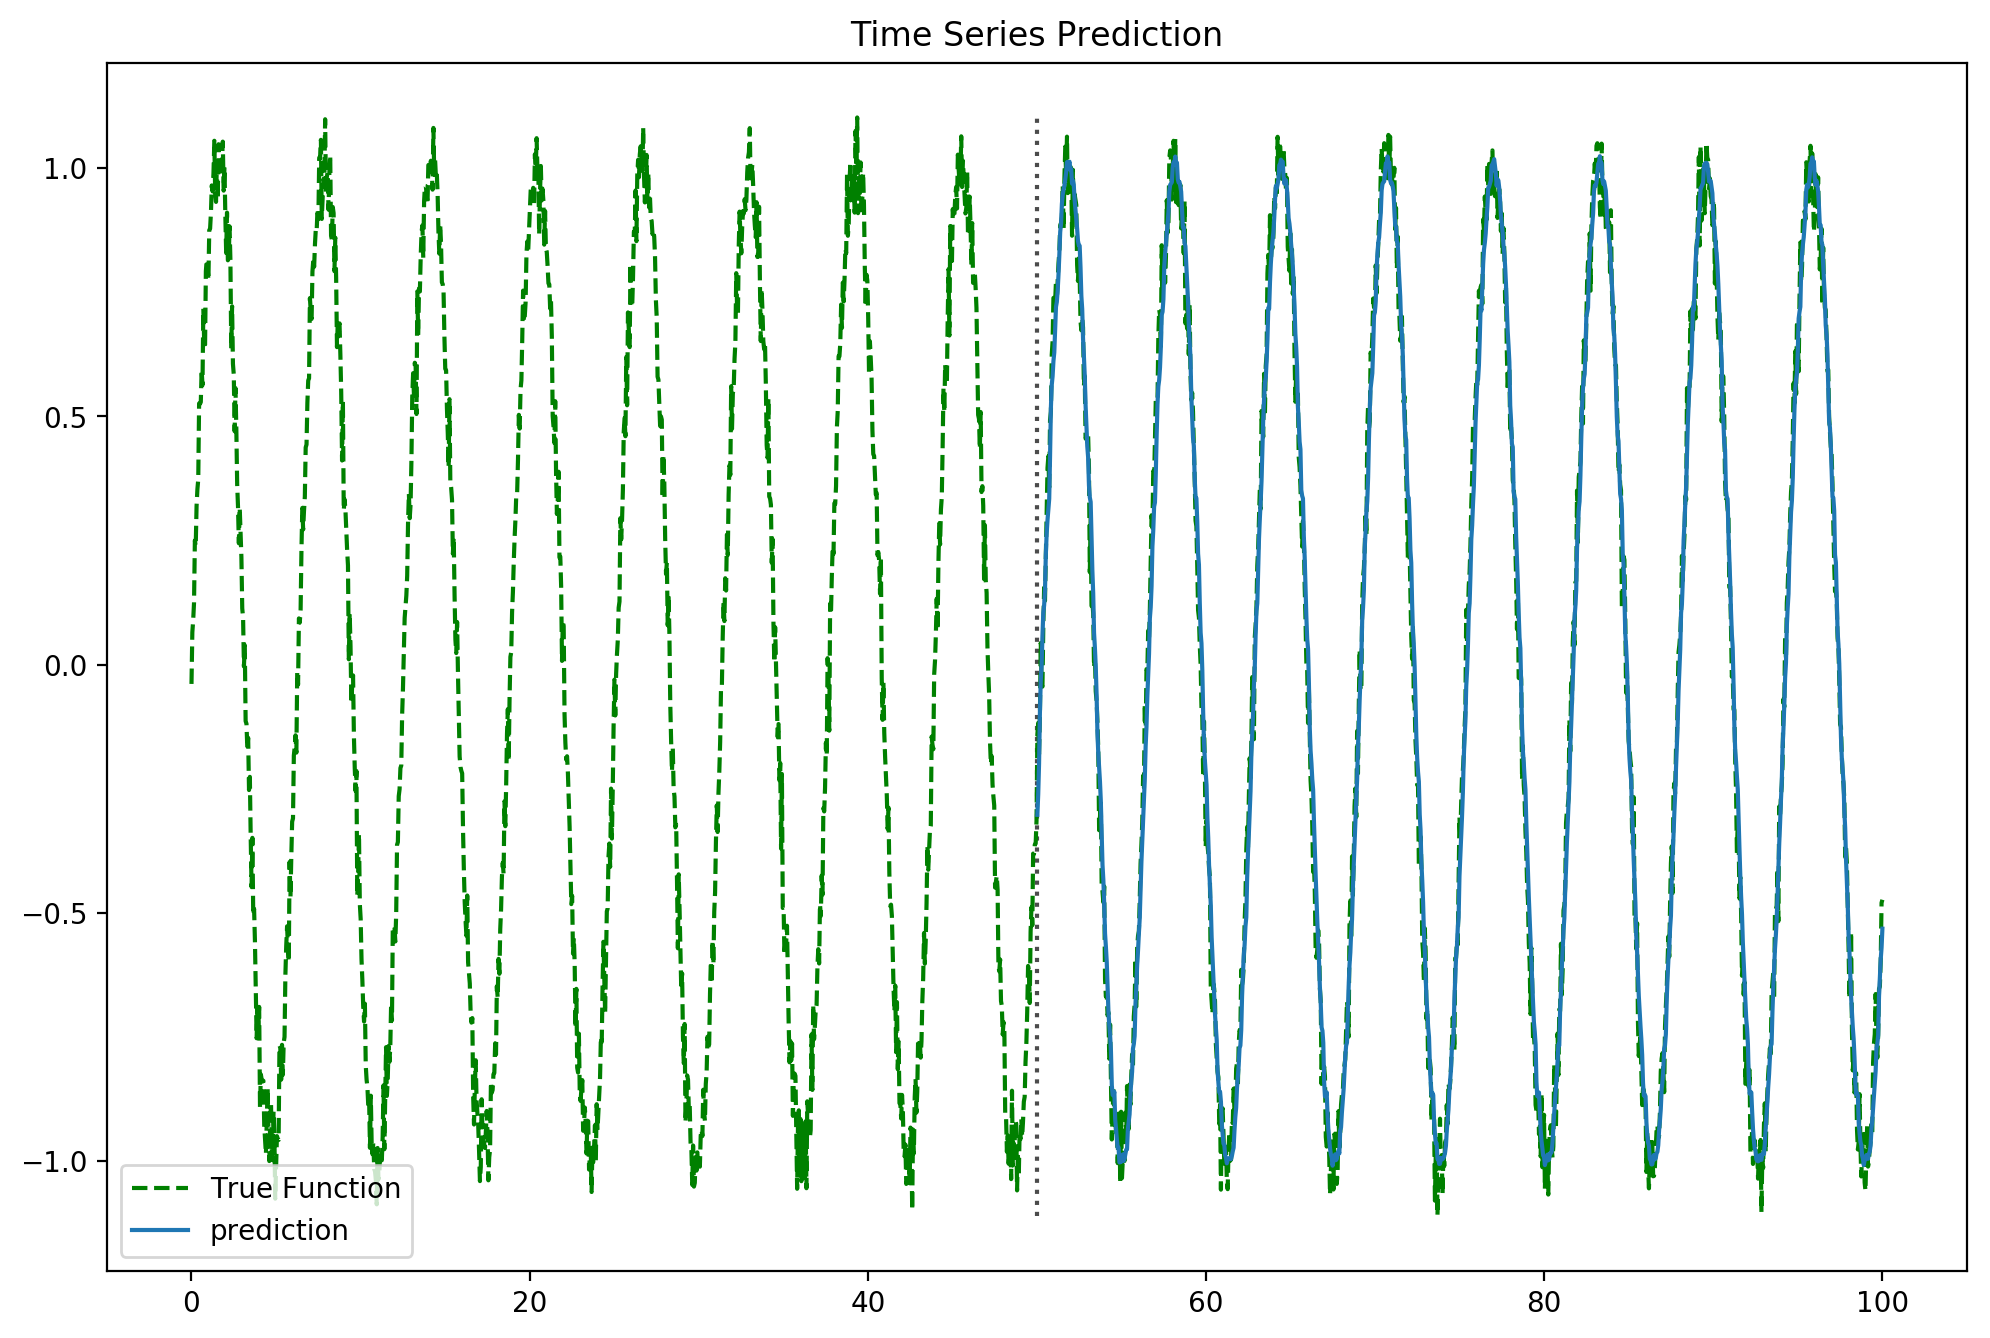

In [137]:
# 可視化する

len_plt1 = 1000

fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi=200)

ax.plot(t_arr[:N4L_ls+len_plt1], x_ordt[:N4L_ls+len_plt1], "--", color="green", label="True Function", alpha = 1.0)
ax.plot(t_arr[N4L_ls:N4L_ls+len_plt1], x_pred_ls[:len_plt1], color="C0", label="prediction")
ax.vlines(t_arr[N4L_ls], ymax=np.max(x_ordt), ymin=np.min(x_ordt), linestyles="dotted", alpha=0.7)
ax.set_title("Time Series Prediction")
plt.legend()
plt.savefig("sklern_time_Lorentz_predict_z.png", dpi=200)

## カオス時系列予測を行う

In [2]:
data = np.loadtxt("data/lorentz_v2.csv",delimiter=",")
print(data.shape)

(4, 50001)


教師データを読み込む

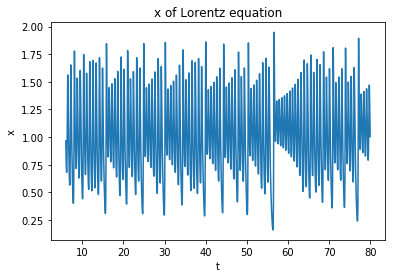

shape of teacher data : (9250,)


In [3]:
#データをまず可視化する
start_point = 3000 # 元データのスタート地点
end_point = 40000 #元データの終了地点
N_samp = 4 #元データからのサンプリング幅



T = data[0, start_point:end_point:N_samp] 
teacher = data[3, start_point:end_point:N_samp] / np.mean(np.abs(data[3, start_point:end_point:N_samp])) 
plt.plot(T, teacher)
plt.title("x of Lorentz equation")
plt.xlabel("t")
plt.ylabel("x")
plt.show()


print("shape of teacher data :", teacher.shape)

ランダムフォレストの設定


In [4]:
RFR =  RandomForestRegressor(max_depth=None, n_estimators=50)

In [5]:
#学習に使えるデータの大きさ
N4L = 5000

# m_t  はn+1ステップを予測するための時系列のサンプル数
m_t = 30
x_train = np.array([teacher[ii : ii + m_t ] for ii in range( N4L - m_t)])
y_train = teacher[m_t:N4L]
print("shape x_train", x_train.shape)
print("shape y_train", y_train.shape)

shape x_train (4970, 30)
shape y_train (4970,)


In [7]:
print(x_train.shape)
# X は (n_samples, n_features) の shape に変形する必要がある
RFR.fit(x_train, y_train)

(4970, 30)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
x_test = x_train[-1]
print(x_test)
print(x_test.shape)

print(x_test.reshape(-1, 1).shape)


[1.43708132 1.41968543 1.40074606 1.38057712 1.35946176 1.33765017
 1.31535928 1.2927739  1.27004891 1.24731216 1.22466765 1.20219877
 1.17997152 1.15803745 1.13643636 1.11519862 1.09434723 1.07389951
 1.05386855 1.03426438 1.01509489 0.99636667 0.97808558 0.96025728
 0.94288764 0.92598311 0.90955096 0.89359961 0.87813883 0.86317998]
(30,)
(30, 1)


In [15]:
# 予測の長さ
len_pred = 50000

for ii in range(len_pred ):
    
    # 予測は平均値と、オプションで 分散、共分散 を得ることが出来る
    y_pred = RFR.predict(x_test[-m_t:].reshape(1, -1))
    #print(pred_mean.shape)
    x_test = np.append(x_test, y_pred)
    
mean_pred = x_test[m_t:]


print("shape mean_pred", mean_pred.shape)


shape mean_pred (55000,)


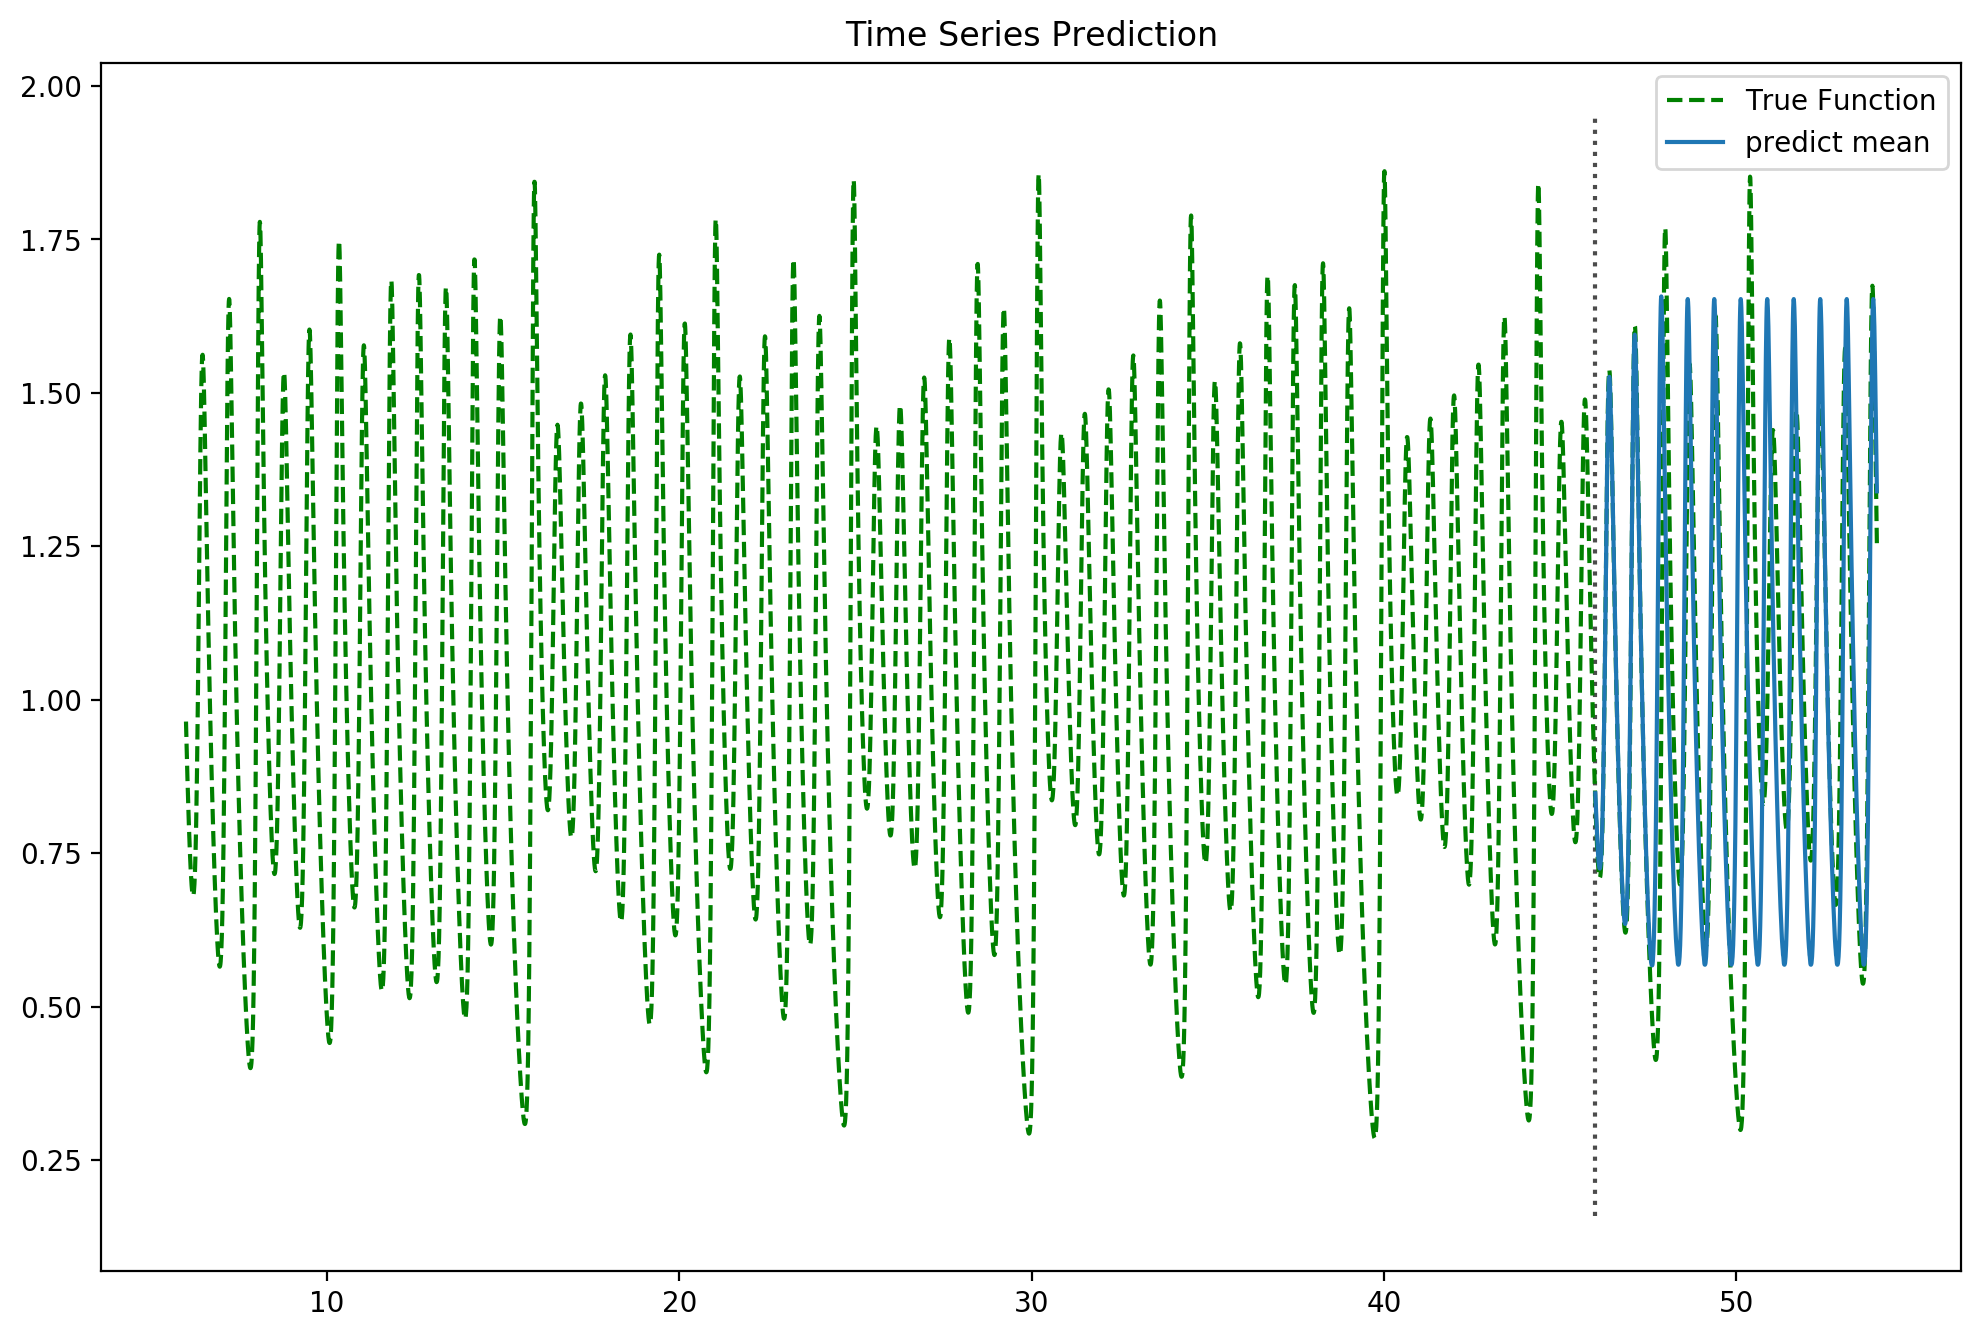

In [16]:
len_plt2 = 1000

fig, ax = plt.subplots(1, 1, figsize=(12,8), dpi=200)

ax.plot(T[:N4L+len_plt2], teacher[:N4L+len_plt2], "--", color="green", label="True Function", alpha = 1.0)
ax.plot(T[N4L:N4L+len_plt2], mean_pred[:len_plt2], color="C0", label="predict mean")
ax.vlines(T[N4L], ymax=np.max(teacher), ymin=np.min(teacher), linestyles="dotted", alpha=0.7)
ax.set_title("Time Series Prediction")
plt.legend()
plt.savefig("sklern_time_Lorentz_predict_z.png", dpi=200)

In [17]:
def trans_2_emb(arr, tau, mm):
    #print(arr.shape[0])
    teacher_emb = np.empty((mm, arr.shape[0]-tau * mm))
    for ii in range(mm): 
        teacher_emb[ii, :] = arr[tau*ii:arr.shape[0]-tau* (mm- ii)]
    return teacher_emb

可視化してみる

In [18]:
tau =10
MM =  3

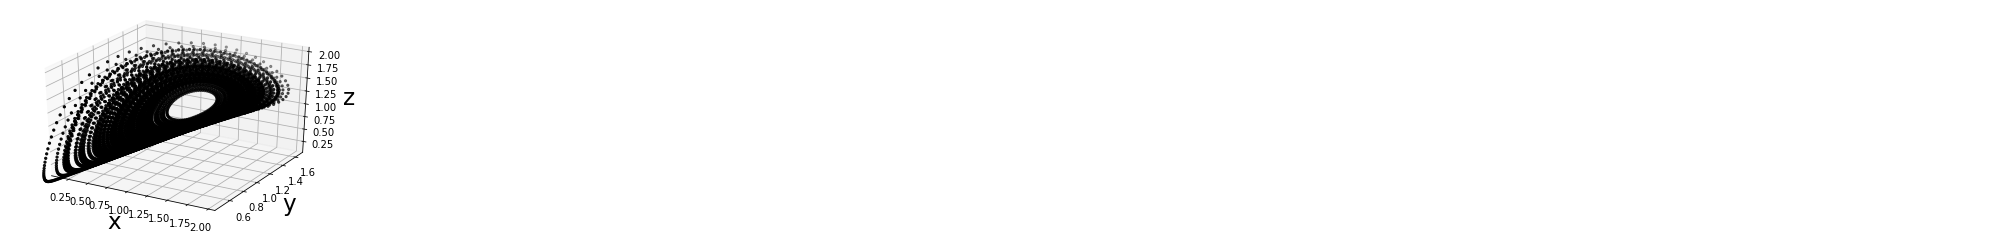

In [19]:
# 教師データ

te_emb = trans_2_emb(teacher[:N4L+len_pred], tau,  MM)

fig3d_te = plt.figure()

ax3d_te   = fig3d_te.add_subplot(111, projection='3d')   # <- axes3dをインポートしていないとエラーになる。
ax3d_te.scatter(te_emb[0,:], te_emb[1,:], te_emb[2,:],c="black", s=5)
ax3d_te.set_xlabel('x',fontsize=23)
ax3d_te.set_ylabel('y',fontsize=23)
ax3d_te.set_zlabel('z',fontsize=23)
ax3d_te.axis('equal')

plt.show()

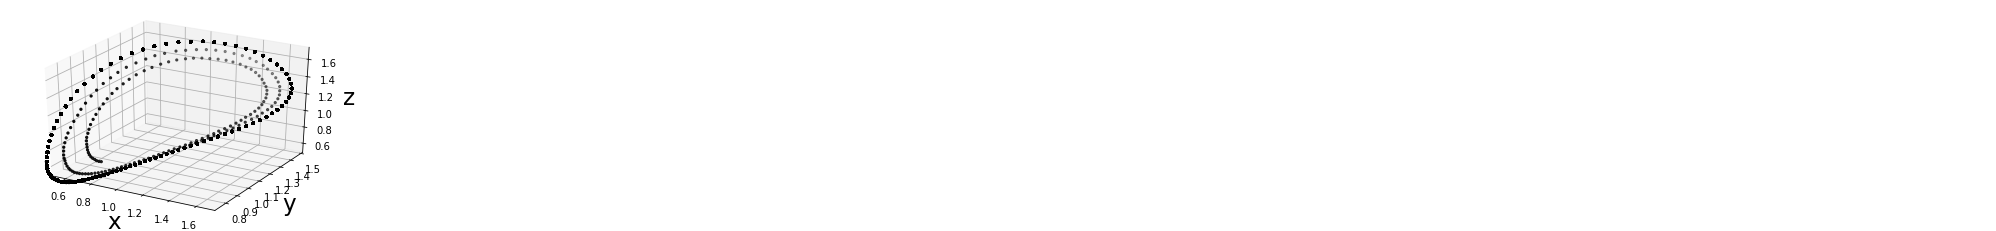

In [20]:
# 予測データ

pr_emb = trans_2_emb(mean_pred, tau,  MM)

fig3d_pr = plt.figure()

ax3d_pr   = fig3d_pr.add_subplot(111, projection='3d')   # <- axes3dをインポートしていないとエラーになる。
ax3d_pr.scatter(pr_emb[0,:], pr_emb[1,:], pr_emb[2,:],c="black", s=5)
ax3d_pr.set_xlabel('x',fontsize=23)
ax3d_pr.set_ylabel('y',fontsize=23)
ax3d_pr.set_zlabel('z',fontsize=23)
ax3d_pr.axis('equal')

plt.show()